# 📊 Public Opinion Analysis on Climate Change (Part A)

This notebook analyzes Facebook comments related to climate change using NLP techniques. It includes sentiment analysis, trend analysis, engagement analysis, and topic modeling.

## 1. Load and Clean Data

In [1]:

import pandas as pd
import re

# Load dataset
df = pd.read_csv("climate_nasa.csv")

# Drop missing comments
df = df.dropna(subset=['text'])

# Convert text to string
df['text'] = df['text'].astype(str)

# Basic cleaning
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,date,likesCount,profileName,commentsCount,text,clean_text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\r\...,neat comparison i have not heard it before\r\n...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,an excellent way to visualise the invisible th...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,does the co2ghg in the troposphere affect the ...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,excellent post i defo feel the difference one...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",yes and carbon dioxide does not harm the earth...


## 2. Sentiment Analysis using TextBlob

In [3]:
pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 22.9 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   ---------------

In [4]:

from textblob import TextBlob

# Sentiment polarity
df['sentiment_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
def label_sentiment(p):
    if p > 0.1:
        return 'positive'
    elif p < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)
df['sentiment_label'].value_counts()


sentiment_label
neutral     289
positive    150
negative     65
Name: count, dtype: int64

## 3. Trend Analysis Over Time

C:\Users\User\AppData\Local\Temp\ipykernel_16276\3741609304.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M').astype(str)


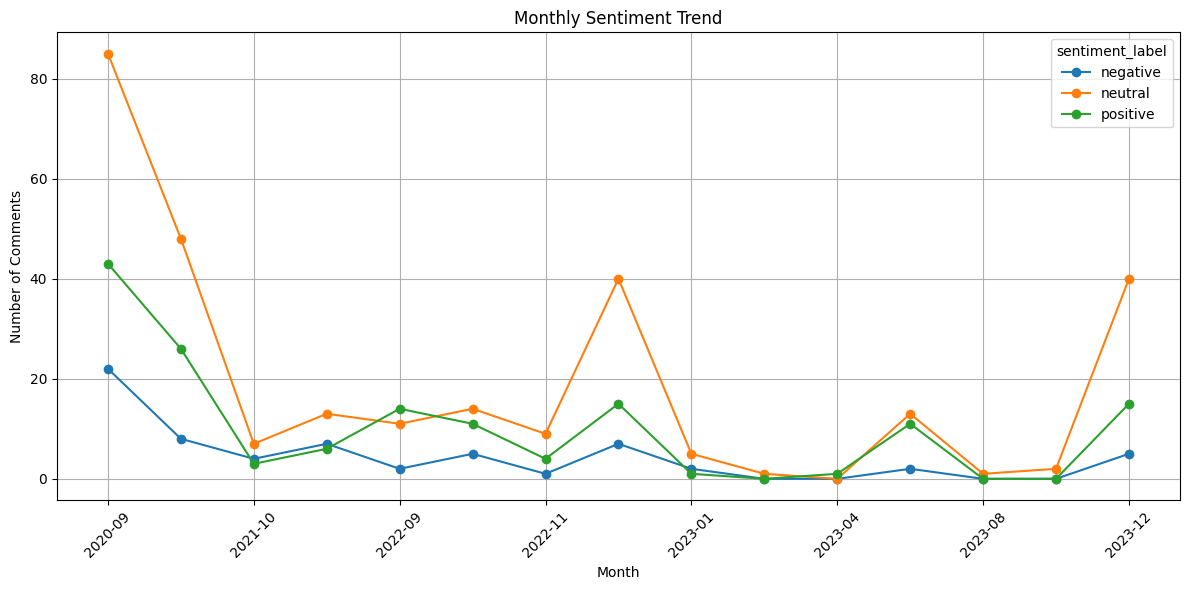

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M').astype(str)

monthly_sentiment = df.groupby(['month', 'sentiment_label']).size().unstack().fillna(0)

# Plot
monthly_sentiment.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Engagement Analysis

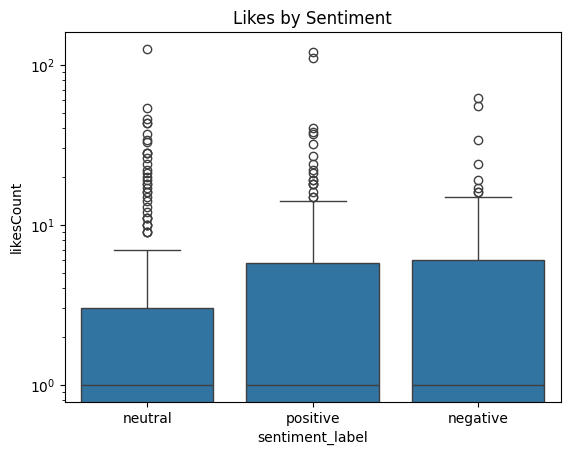

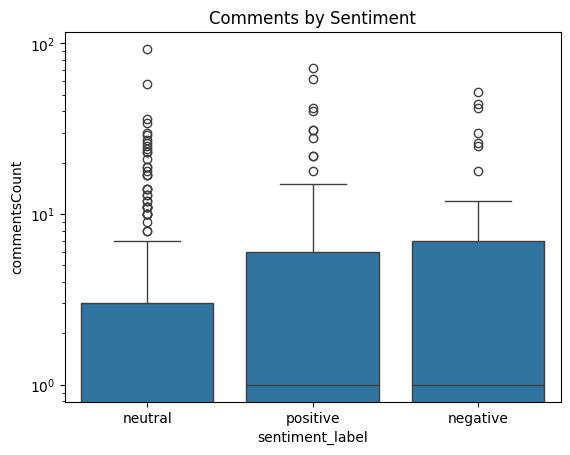

,likesCount,commentsCount
sentiment_label,,
negative,5.94,5.68
neutral,3.92,3.51
positive,6.23,4.86


In [6]:

df['commentsCount'] = df['commentsCount'].fillna(0).astype(int)

# Boxplots
sns.boxplot(x='sentiment_label', y='likesCount', data=df)
plt.title('Likes by Sentiment')
plt.yscale('log')
plt.show()

sns.boxplot(x='sentiment_label', y='commentsCount', data=df)
plt.title('Comments by Sentiment')
plt.yscale('log')
plt.show()

# Summary
df.groupby('sentiment_label')[['likesCount', 'commentsCount']].mean().round(2)


## 5. Topic Modeling with LDA

In [7]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Top words per topic
def get_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]])

get_topics(lda_model, vectorizer.get_feature_names_out())


Topic 1:  ['climate', 'change', 'energy', 'human', 'know', 'co2', 'thats', 'lives', 'graph', 'planet']
Topic 2:  ['dont', 'going', 'think', 'people', 'global', 'better', 'need', 'warming', 'que', 'pollution']
Topic 3:  ['global', 'warming', 'carbon', 'co2', 'atmosphere', 'dioxide', 'water', 'year', 'level', 'sea']
Topic 4:  ['planet', 'years', 'temperature', 'earth', 'just', 'age', 'happened', 'day', 'ice', 'stop']
Topic 5:  ['climate', 'change', 'earth', 'nasa', 'people', 'just', 'weather', 'does', 'heat', 'science']


## ✅ Summary
- Completed sentiment, trend, engagement, and topic analysis on NASA Climate comments.
- This analysis supports understanding public discourse around climate change.